In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()
# by seeing count we can know there is no null values and we can proceed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.shape

(1599, 12)

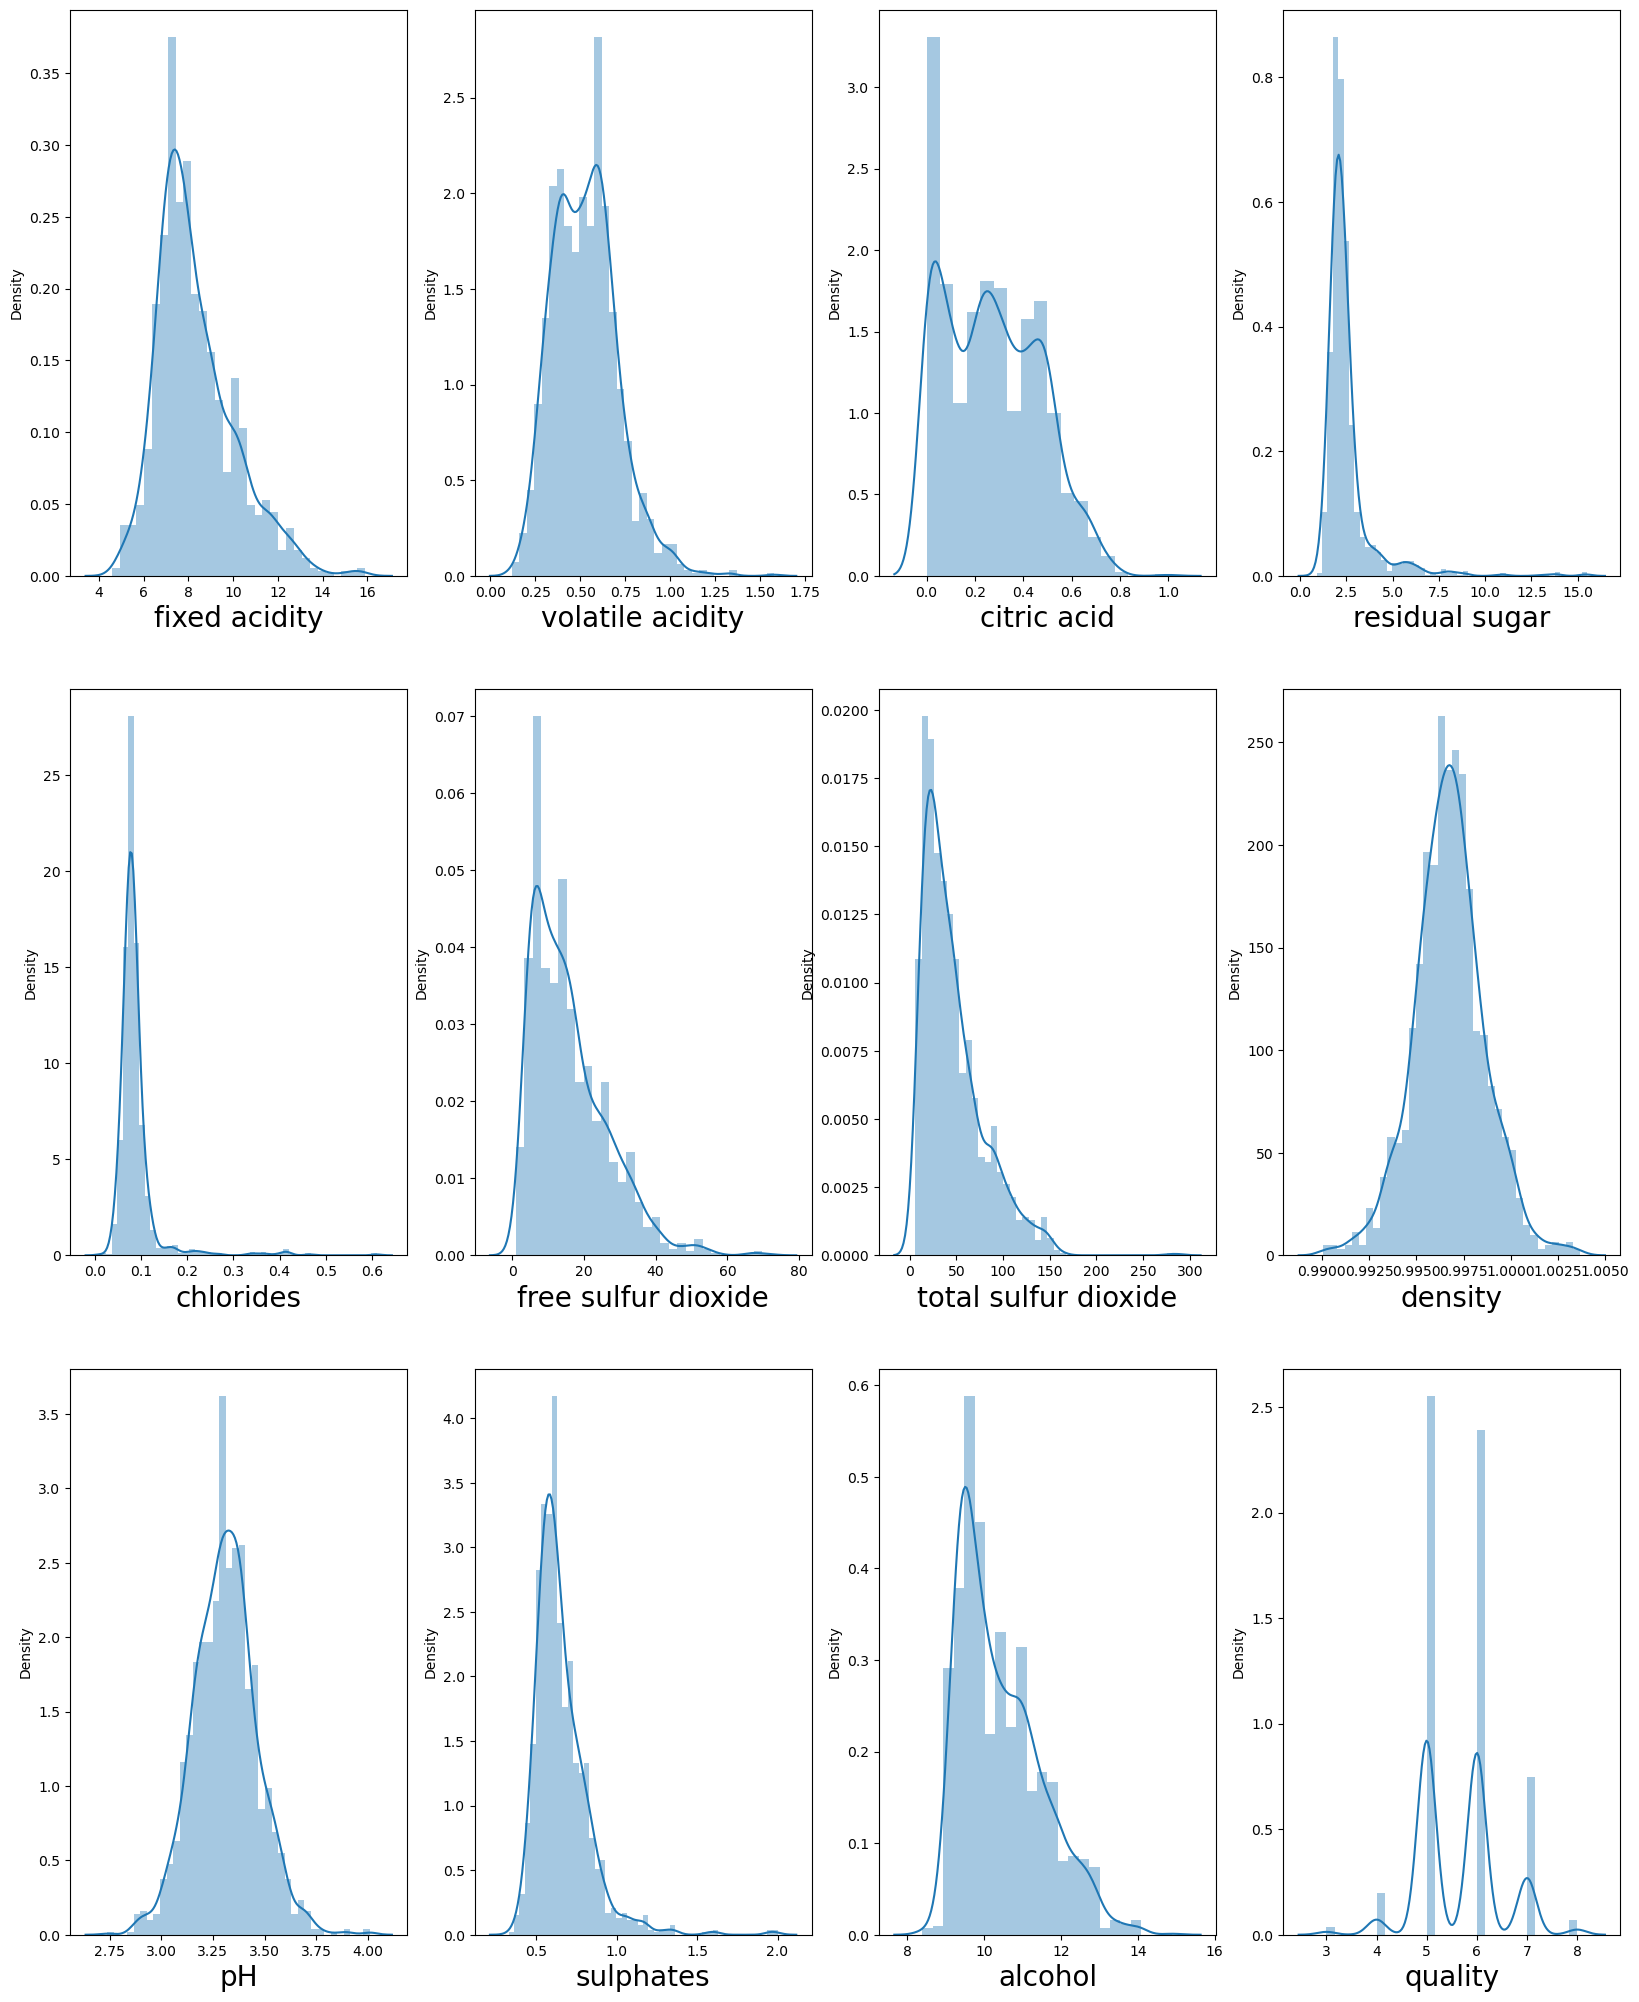

In [5]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber <= 12 :
        ax = plt.subplot(3,4,plotnumber)
        sn.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

In [6]:
df_features = data.drop('quality',axis = 1)

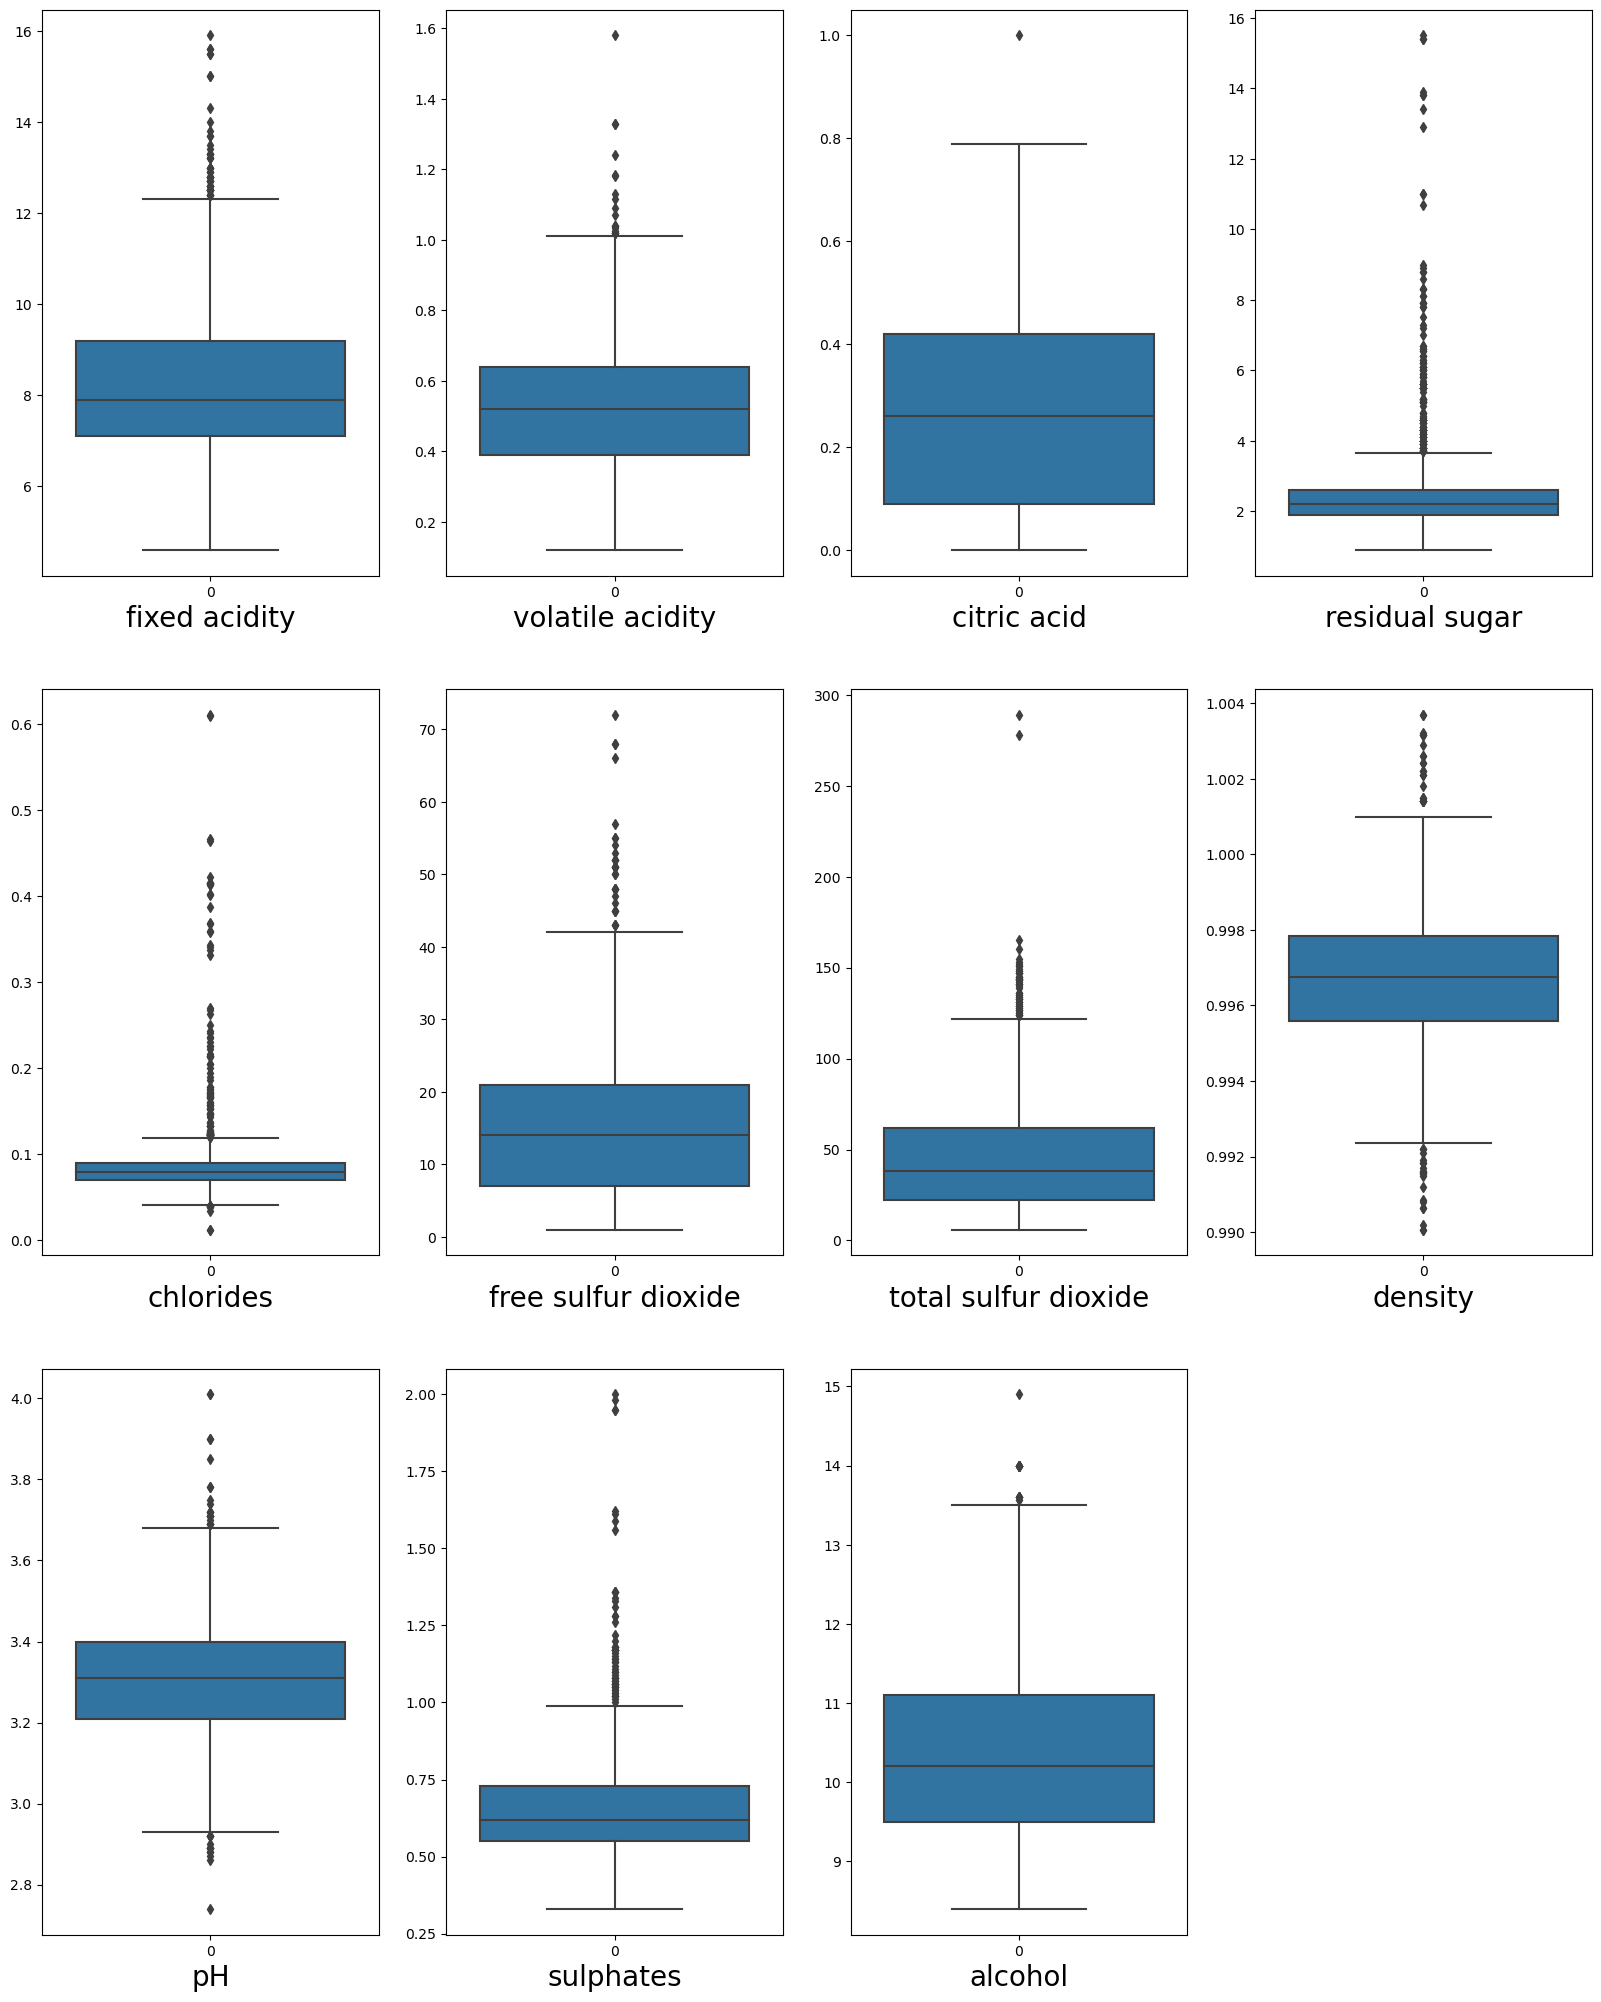

In [7]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df_features:
    if plotnumber <= 12 :
        ax = plt.subplot(3,4,plotnumber)
        sn.boxplot(data = df_features[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

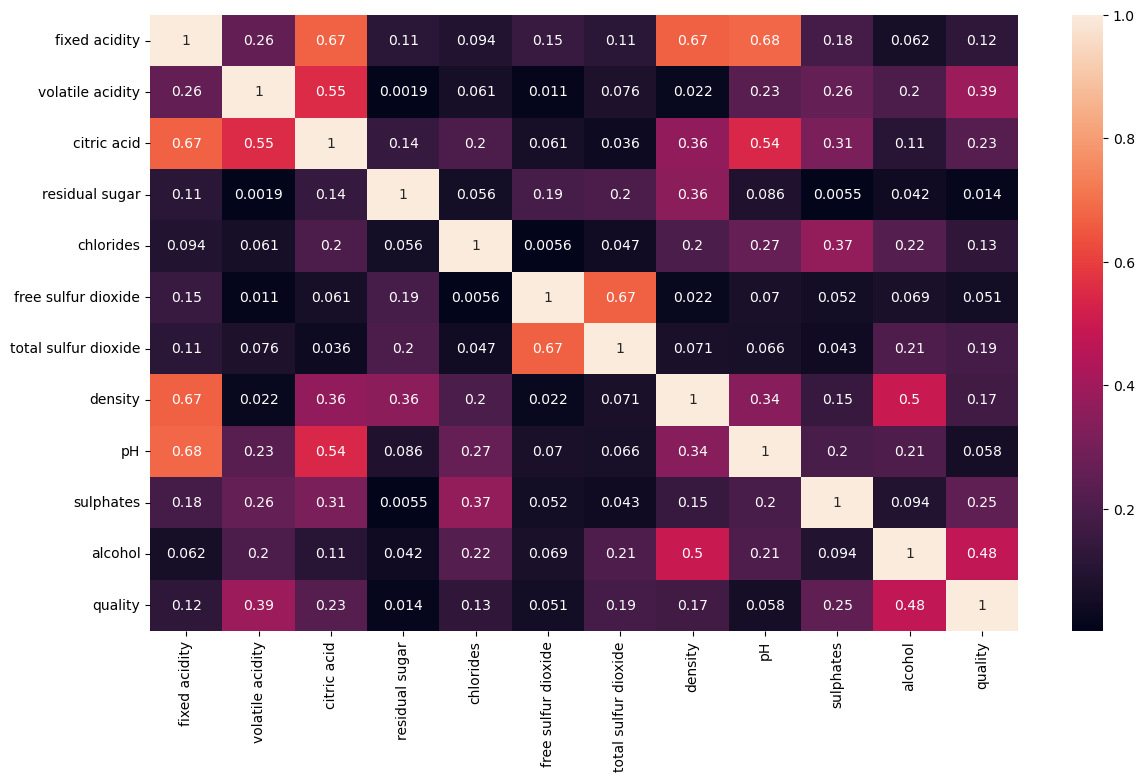

In [8]:
# There are outliers present in the dataset,but i think we can continue with these outliers because it is connected with the labels
# checking the connection between features and labels

df_corr = data.corr().abs()
plt.figure(figsize = (14,8))
sn.heatmap(df_corr, annot = True, annot_kws = {'size':10})
plt.show()

In [9]:
# As all the features are connected with labels we keep every features
X = data.drop('quality',axis = 1)
Y = data['quality']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [11]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_predict = clf.predict(x_train)
        print('\n ---------- Train Result ----------')
        print(f'Accuracy Score : {accuracy_score(y_train,y_predict)  * 100:.2f}%')
        
        
    elif train == False:
        predict = clf.predict(x_test)
        print('\n ---------- Test Result ----------')
        print(f'Accuracy Score : {accuracy_score(y_test,predict)  * 100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test,predict,digits = 2))

In [12]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 100.00%

 ---------- Test Result ----------
Accuracy Score : 59.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.74      0.64      0.69       183
           6       0.54      0.60      0.57       149
           7       0.52      0.54      0.53        52
           8       0.00      0.00      0.00         4

    accuracy                           0.59       400
   macro avg       0.30      0.30      0.30       400
weighted avg       0.61      0.59      0.60       400



In [29]:
grid_param = {'criterion': ['grid','entropy'],
             'max_depth' : range(20,25),
              'min_samples_leaf' : range(2,6),
              'min_samples_split' : range(3,8),
              'max_leaf_nodes' : range(5,10)
             }

In [30]:
grid_search = GridSearchCV(estimator = clf,param_grid = grid_param,cv = 5)

In [31]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              max_leaf_nodes=9,
                                              min_samples_leaf=2,
                                              min_samples_split=3),
             param_grid={'criterion': ['grid', 'entropy'],
                         'max_depth': range(20, 25),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [32]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [33]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_leaf_nodes = 9, min_samples_leaf = 2, min_samples_split = 3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9,
                       min_samples_leaf=2, min_samples_split=3)

In [34]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 59.13%

 ---------- Test Result ----------
Accuracy Score : 57.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.66      0.74      0.70       183
           6       0.52      0.45      0.48       149
           7       0.44      0.56      0.49        52
           8       0.00      0.00      0.00         4

    accuracy                           0.58       400
   macro avg       0.27      0.29      0.28       400
weighted avg       0.55      0.58      0.56       400



In [ ]:
#checking with the other models

In [35]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [36]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 57.96%

 ---------- Test Result ----------
Accuracy Score : 58.50%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         9
           5       0.69      0.72      0.71       183
           6       0.50      0.67      0.57       149
           7       0.29      0.04      0.07        52
           8       0.00      0.00      0.00         4

    accuracy                           0.58       400
   macro avg       0.25      0.24      0.22       400
weighted avg       0.54      0.58      0.54       400



In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 66.56%

 ---------- Test Result ----------
Accuracy Score : 48.25%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.20      0.11      0.14         9
           5       0.56      0.63      0.59       183
           6       0.40      0.42      0.41       149
           7       0.45      0.25      0.32        52
           8       0.00      0.00      0.00         4

    accuracy                           0.48       400
   macro avg       0.27      0.24      0.24       400
weighted avg       0.47      0.48      0.47       400

